In [21]:
# !pip install sqlalchemy
# !pip install pymysql
# !pip install mysql-connector-python
# !pip install geopy

In [11]:
# Sources Consulted: # https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe
# import sqlalchemy as db
# from sqlalchemy import create_engine
# from sqlalchemy.sql import select
from sqlalchemy import create_engine
import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# getting details to connect to database:
DB_HOST = config.hostname
DB_USER = config.username
DB_PASS = config.password
DB_PORT = config.port
DB_NAME = config.db_name

In [14]:
# create a connection to the MySQL database
engine = create_engine("mysql+pymysql://{0}:{1}@{2}".format(DB_USER, DB_PASS, DB_HOST), echo=True) 
connection = engine.connect()

sql_weather = """SELECT availability.number,  DATE_FORMAT(FROM_UNIXTIME(`date_time`), '%%Y-%%m-%%d %%H:%%i:%%s') as "date_time", weather_main, weather_description, temperature, temp_feels_like, pressure, humidity, visibility, wind_speed
                    FROM dbbikes.weather_history
                    INNER JOIN dbbikes.availability
                    WHERE weather_history.date_time = availability.last_update
                    order by last_update desc
                    limit 500;"""

# # create a cursor object to execute SQL queries
# cursor = cnx.cursor()
# # determine averages 
# # execute a select query on a table and fetch the results
# # hour, dayly, monthly data - hour, month

# https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe
df_weather = pd.read_sql_query(sql_weather, engine) 

2023-04-07 12:41:41,910 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-04-07 12:41:41,910 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-07 12:41:42,094 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-04-07 12:41:42,094 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-07 12:41:42,178 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-04-07 12:41:42,178 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-07 12:41:42,925 INFO sqlalchemy.engine.Engine SELECT availability.number,  DATE_FORMAT(FROM_UNIXTIME(`date_time`), '%%Y-%%m-%%d %%H:%%i:%%s') as "date_time", weather_main, weather_description, temperature, temp_feels_like, pressure, humidity, visibility, wind_speed
                    FROM dbbikes.weather_history
                    INNER JOIN dbbikes.availability
                    WHERE weather_history.date_time = availability.last_update
                    order by last_update desc
                    limit 500;
2023-04-07 12:41:42,925 INFO sqlalchem

In [15]:
df_weather.shape

(500, 10)

In [16]:
df_weather.head()

,number,date_time,weather_main,weather_description,temperature,temp_feels_like,pressure,humidity,visibility,wind_speed
0,42,2023-04-07 08:00:02,Clouds,broken clouds,280.93,279.7,1021,88,10000,2.06
1,30,2023-04-07 08:00:02,Clouds,broken clouds,280.93,279.7,1021,88,10000,2.06
2,54,2023-04-07 08:00:02,Clouds,broken clouds,280.93,279.7,1021,88,10000,2.06
3,108,2023-04-07 08:00:02,Clouds,broken clouds,280.93,279.7,1021,88,10000,2.06
4,20,2023-04-07 08:00:02,Clouds,broken clouds,280.93,279.7,1021,88,10000,2.06


In [8]:
df_weather.tail()

,weather_id,number,name,date_time,weather_main,weather_description,temperature,temp_feels_like,pressure,humidity,visibility,wind_speed
495,802,42,SMITHFIELD NORTH,2023-03-13 19:11:38,Clouds,scattered clouds,280.03,276.18,986,78,10000,6.71
496,802,42,SMITHFIELD NORTH,2023-03-13 19:10:03,Clouds,scattered clouds,280.03,276.18,986,78,10000,6.71
497,500,42,SMITHFIELD NORTH,2023-03-13 19:00:00,Rain,light rain,280.00,276.14,986,77,10000,6.71
498,802,42,SMITHFIELD NORTH,2023-03-13 18:56:40,Clouds,scattered clouds,280.08,276.24,986,78,10000,6.71
499,802,42,SMITHFIELD NORTH,2023-03-13 18:50:03,Clouds,scattered clouds,280.08,276.24,986,78,10000,6.71


In [17]:
df_weather.dtypes

number                   int64
date_time               object
weather_main            object
weather_description     object
temperature            float64
temp_feels_like        float64
pressure                 int64
humidity                 int64
visibility               int64
wind_speed             float64
dtype: object

In [20]:
df_weather["humidity"].fillna(0)

0      88
1      88
2      88
3      88
4      88
       ..
495    73
496    73
497    73
498    73
499    73
Name: humidity, Length: 500, dtype: int64

In [40]:
categorical_columns = df_weather[['number','weather_main', 'weather_description']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df_weather[column] = df_weather[column].astype('category') 
    
df_weather["humidity"] = df_weather["humidity"].fillna(0)
df_weather["humidity"] = df_weather["humidity"].astype('int64')  
continuous_columns = df_weather.select_dtypes(['int64','float64']).columns

datetime_columns = df_weather[['date_time']].columns
for column in datetime_columns:
    df_weather[column] = df_weather[column].astype('datetime64[ns]') 

df_weather.dtypes

number                       category
date_time              datetime64[ns]
weather_main                 category
weather_description          category
temperature                   float64
temp_feels_like               float64
pressure                        int64
humidity                        int64
visibility                      int64
wind_speed                    float64
dtype: object

In [23]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df_weather.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df_weather[df_weather.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [24]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
df_weatherT = df_weather.T
print("Number of duplicate (excluding first) columns in the table is: ", df_weatherT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  df_weatherT[df_weatherT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [25]:
df_weather.select_dtypes(['category']).describe().T

,count,unique,top,freq
number,500,114,1,5
weather_main,500,1,Clouds,500
weather_description,500,2,broken clouds,272


In [28]:
df_weather.select_dtypes(include=['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,500.0,281.32472,2.992319,278.24,279.25,280.93,282.98,286.24
temp_feels_like,500.0,279.73240,3.115645,276.92,277.15,279.70,280.12,285.01
pressure,500.0,1019.19200,1.743909,1016.00,1017.00,1020.00,1020.00,1021.00
humidity,500.0,75.96400,12.686236,54.00,73.00,79.00,84.00,88.00
visibility,500.0,10000.00000,0.000000,10000.00,10000.00,10000.00,10000.00,10000.00
wind_speed,500.0,3.94472,2.632764,1.54,2.06,3.09,6.17,8.23


In [30]:
df_weather.select_dtypes(include=['datetime64[ns]']).describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
date_time,500,2023-04-06 22:13:35.372,2023-04-06 10:45:02,2023-04-06 14:15:02,2023-04-06 22:35:01,2023-04-07 00:30:02,2023-04-07 08:00:02


In [31]:
df_weather.isnull().sum()

number                 0
date_time              0
weather_main           0
weather_description    0
temperature            0
temp_feels_like        0
pressure               0
humidity               0
visibility             0
wind_speed             0
dtype: int64

array([[<AxesSubplot: title={'center': 'temperature'}>,
        <AxesSubplot: title={'center': 'temp_feels_like'}>,
        <AxesSubplot: title={'center': 'pressure'}>],
       [<AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'visibility'}>,
        <AxesSubplot: title={'center': 'wind_speed'}>],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

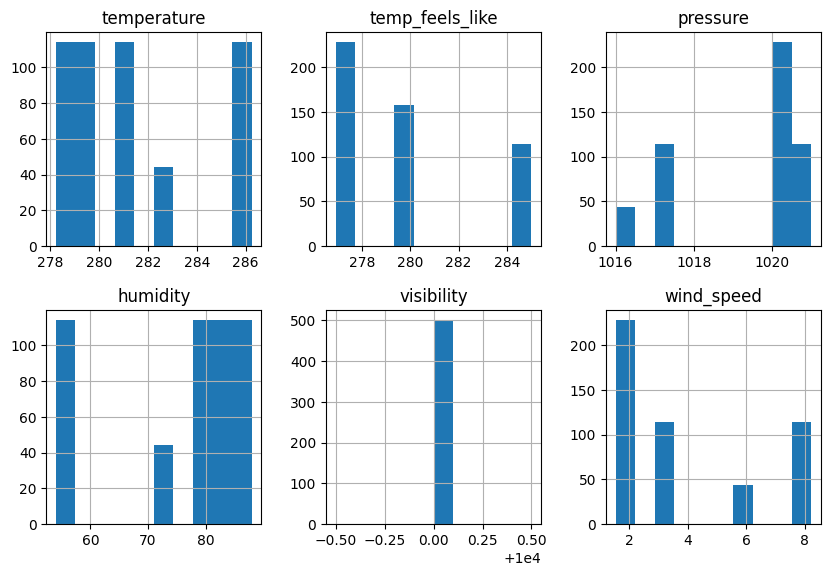

In [32]:
df_weather[continuous_columns].hist(layout=(3, 3), figsize=(10,10), bins=10)

temperature           AxesSubplot(0.125,0.653529;0.227941x0.226471)
temp_feels_like    AxesSubplot(0.398529,0.653529;0.227941x0.226471)
pressure           AxesSubplot(0.672059,0.653529;0.227941x0.226471)
humidity              AxesSubplot(0.125,0.381765;0.227941x0.226471)
visibility         AxesSubplot(0.398529,0.381765;0.227941x0.226471)
wind_speed         AxesSubplot(0.672059,0.381765;0.227941x0.226471)
dtype: object

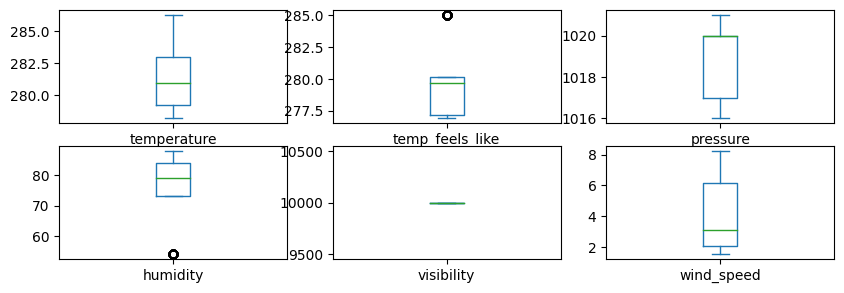

In [33]:
df_weather[continuous_columns].plot(kind='box', subplots=True, figsize=(10,5), layout=(3,3), sharex=False, sharey=False)

<AxesSubplot: >

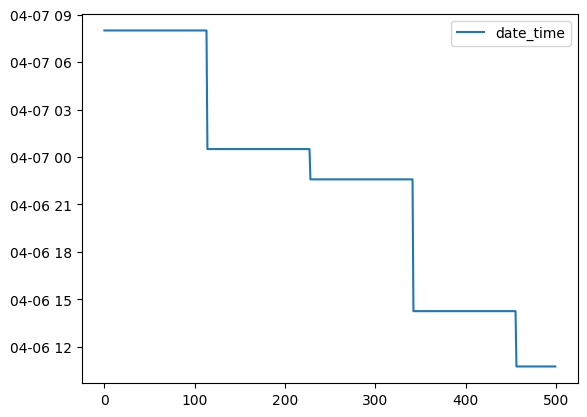

In [41]:
df_weather[datetime_columns].plot()

Index(['date_time'], dtype='object')


array([[<AxesSubplot: title={'center': 'date_time'}>]], dtype=object)

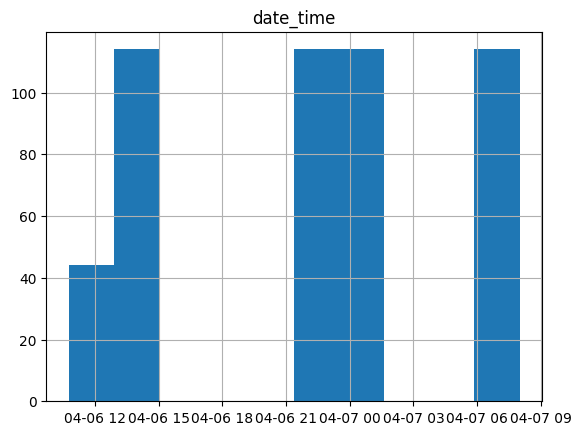

In [44]:
print(datetime_columns)
df_weather[datetime_columns].hist()
# df_weather[datetime_columns]

Text(0.5, 1.0, 'number')

Text(0, 0.5, 'number of occurances')

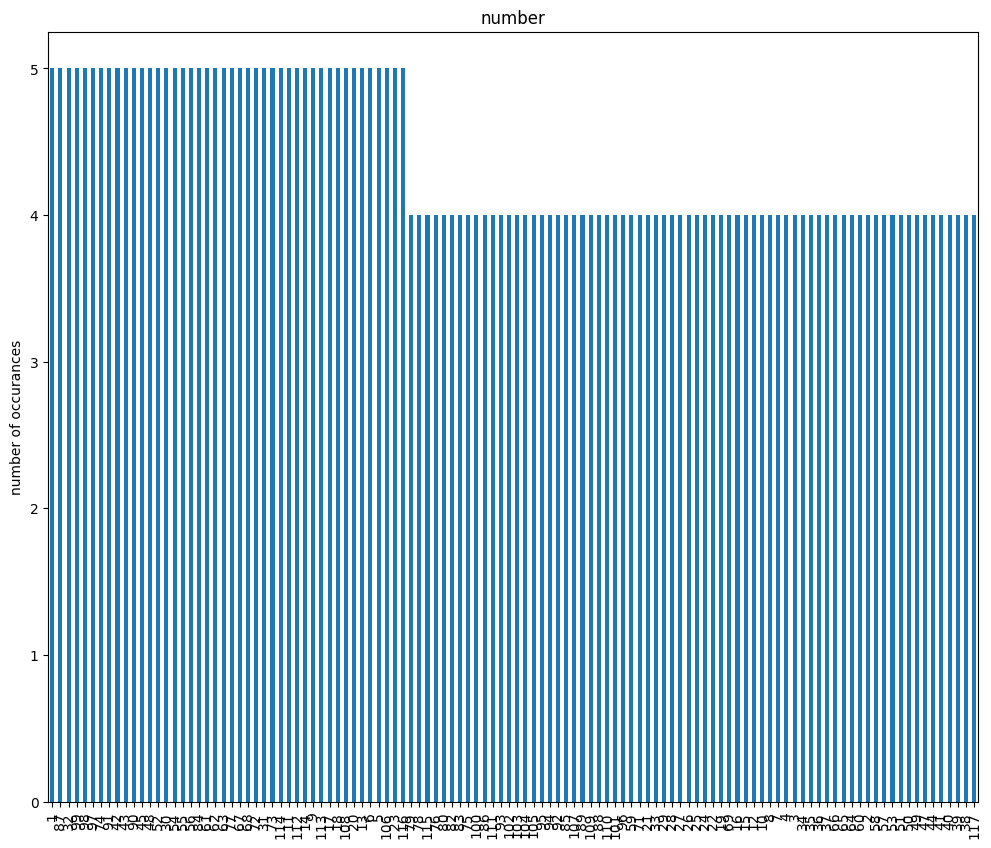

Text(0.5, 1.0, 'weather_main')

Text(0, 0.5, 'number of occurances')

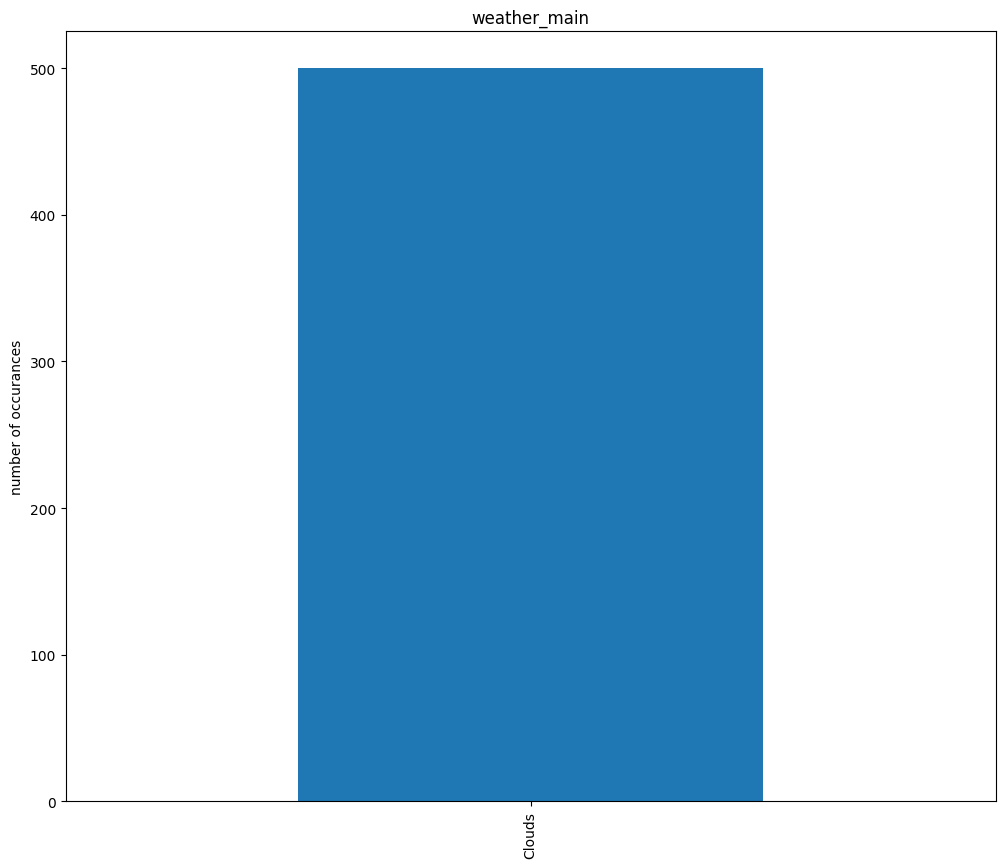

Text(0.5, 1.0, 'weather_description')

Text(0, 0.5, 'number of occurances')

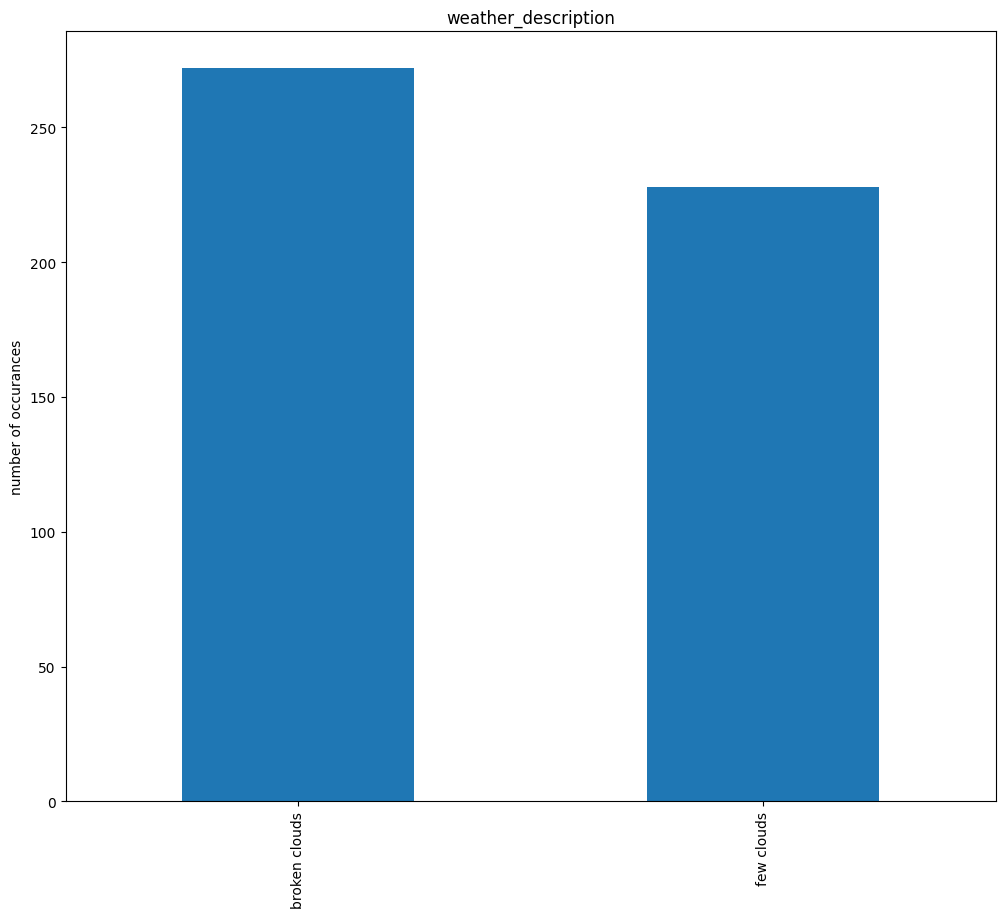

In [45]:
for col in categorical_columns:
    f = df_weather[col].value_counts().plot(kind='bar', figsize=(12,10))
    plt.title(col)
    plt.ylabel('number of occurances')
    plt.show()

In [46]:
df_weather.columns

Index(['number', 'date_time', 'weather_main', 'weather_description',
       'temperature', 'temp_feels_like', 'pressure', 'humidity', 'visibility',
       'wind_speed'],
      dtype='object')

In [48]:
df_weather[["temperature", "temp_feels_like", "number", "date_time"]].sort_values("date_time")[:50]

,temperature,temp_feels_like,number,date_time
499,282.98,280.12,73,2023-04-06 10:45:02
474,282.98,280.12,106,2023-04-06 10:45:02
473,282.98,280.12,23,2023-04-06 10:45:02
472,282.98,280.12,1,2023-04-06 10:45:02
471,282.98,280.12,14,2023-04-06 10:45:02
470,282.98,280.12,98,2023-04-06 10:45:02
469,282.98,280.12,31,2023-04-06 10:45:02
468,282.98,280.12,43,2023-04-06 10:45:02
467,282.98,280.12,13,2023-04-06 10:45:02
466,282.98,280.12,48,2023-04-06 10:45:02
